<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module02_04_RELU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReLU

## So you promised to demystify machine learning...

Neural networks need nonlinearity to address nonlinear problems. The primary way of inserting that nonlinearity is in the activation function.

When we introduced neural networks, we identified some desirable properties that activations functions should have:
   1. Computationally simple.
   2. For initial, small, weight values the function is close to linear.  As the weight magnitudes grow, the function becomes increasingly nonlinear.
   3. The derivative of the function is computationally simple.
   4. The magnitude of the derivative decreases as the weight magnitudes grows, perhaps asymptotically.
   5. The maximum value of the magnitude of the derivative is limited.

We also identified two such functions and their derivatives:
* sigmoid ($\sigma(x)$): $\frac{1}{1+e^{-x}}$, $\sigma(x) \times (1-\sigma(x))$
* tanh: $\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$, $1-tanh^2(x)$

What do these functions actually do?  Let's take another look at them and their derivatives, this time in graph form:

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Evan\AppData\Local\Temp\ipykernel_17536\3311954599.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xs, sig(xs), 'b-', linewidth=3, label='$\sigma(a)$')
C:\Users\Evan\AppData\Local\Temp\ipykernel_17536\3311954599.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xs, dsig(xs), 'b--', linewidth=3, label='$d \sigma(a)/da$')


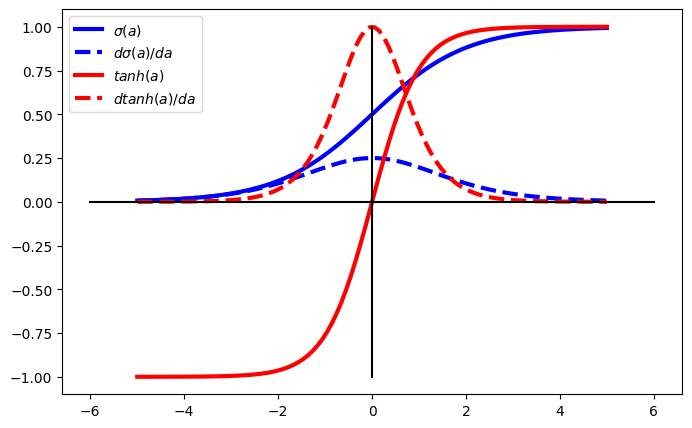

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sig(a):
    return 1 / (1 + np.exp(-a))

def tanh(a):
    return np.tanh(a)

def dsig(a):
    y = sig(a)
    return y * (1 - y)

def dtanh(a):
    y = tanh(a)
    return 1 - y*y

plt.figure(figsize=(8,5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, sig(xs), 'b-', linewidth=3, label='$\sigma(a)$')
plt.plot(xs, dsig(xs), 'b--', linewidth=3, label='$d \sigma(a)/da$')

plt.plot(xs, tanh(xs), 'r-', linewidth=3, label='$tanh(a)$')
plt.plot(xs, dtanh(xs), 'r--', linewidth=3, label='$d tanh(a)/da$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-1, 1), 'k')
plt.legend(loc='best');

## Where's my gradient?

The derivative of sigmoid and tanh function decreases as $x$ gets further from 0.

Recall that weight updates after a predicted output $z$ are generally computed based on 3 things*:
1. The learning rate.
2. The error between output $z$ and known target $t$.
3. **The gradient at $z$**.

\*absent fancy things like Adam

Therefore if the gradient is small, the weight update is likely to be small too.

We like derivative functions that don't explode as $\mid x \mid$ gets larger, so that the weight update isn't *too* large, missing the local optimum entirely.

But there is a downside to activation functions and their derivative values being too small as well:
- For a given activation function $h$...
 * If $h(x)$ is too close to 0, then the outputs of the layer with that function will be close to 0 (sigmoid has this problem, which is why we prefer $tanh$);
 * If $\frac{d h(x)}{dx}$ is too close to 0, then no useful information can be backpropagated to update the weights.

This last point is broadly known as the **vanishing gradient problem**.  It can cause neural network training to slow to a crawl or even stop entirely.

Both the sigmoid function and the hyperbolic tangent (tanh) function can suffer from this problem.

## Enter ReLU

The ***Re*ctified *L*inear *U*nit**. "Unit" here of course refers to the neuron the ReLU (or "rectifier") function is used in, and since neural nets deploy units in layers, we can speak of "ReLU layers," where all units have ReLU activation, just like all units in the hidden layer in our intro to neural nets examples use the *tanh* function.

$ReLU(x) = \begin{cases} 0, & \text{if } x \leq 0 \\ x, & \text{if } x > 0 \end{cases} = max(0, x)$

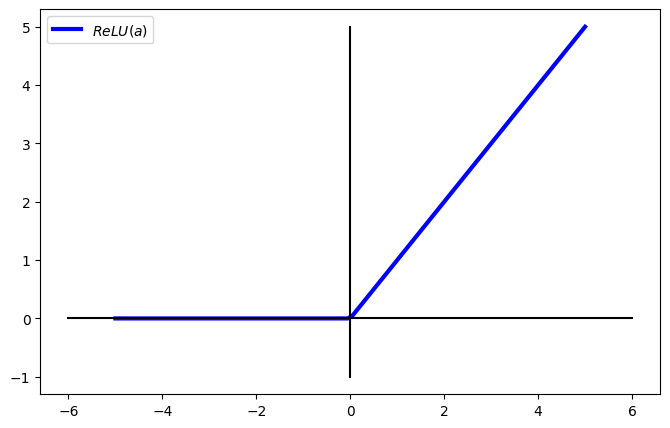

In [3]:
def relu(a):
    return np.maximum(0, a)

plt.figure(figsize=(8,5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, relu(xs), 'b-', linewidth=3, label='$ReLU(a)$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-1, 5), 'k')
plt.legend(loc='best');

$ReLU(x)$ simply takes the positive portion of $x$!

What is ReLU's derivative?

Well, if $x \leq 0$, then $ReLU(x)$ always equals a constant 0.  The derivative of any constant is 0, so if $x \leq 0$, then $\frac{d ReLU(x)}{dx} = 0$.  If $x > 0$, then $ReLU(x)$ = $x$, and $\frac{dx}{dx} = 1$, so if $x > 0$, then $\frac{d ReLU(x)}{dx} = 1$.  The derivative of ReLU, the *rectifier* function, is called the *heaviside step* function.

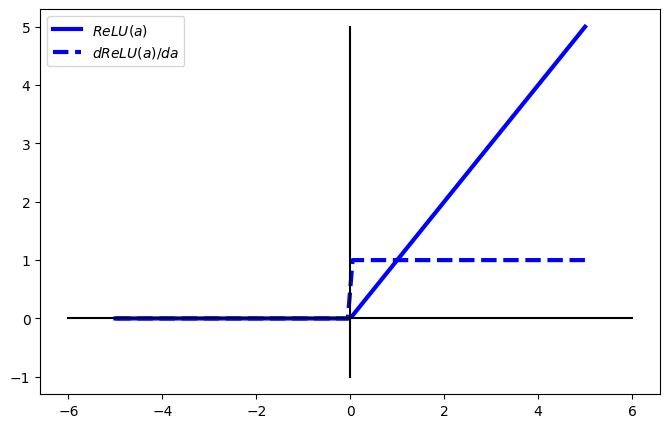

In [4]:
def drelu(a):
        return np.heaviside(a, 1)

plt.figure(figsize=(8,5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, relu(xs), 'b-', linewidth=3, label='$ReLU(a)$')
plt.plot(xs, drelu(xs), 'b--', linewidth=3, label='$d ReLU(a)/da$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-1, 5), 'k')
plt.legend(loc='best')

In [5]:
#S is weight sum
S = 5 - np.arange(5*2).reshape(5,2)
S

array([[ 5,  4],
       [ 3,  2],
       [ 1,  0],
       [-1, -2],
       [-3, -4]])

In [6]:
Y = np.tanh(S)
Y

array([[ 0.9999092 ,  0.9993293 ],
       [ 0.99505475,  0.96402758],
       [ 0.76159416,  0.        ],
       [-0.76159416, -0.96402758],
       [-0.99505475, -0.9993293 ]])

In [7]:
def relu(S):
    '''S is n_samples x n_units'''
    S[S < 0] = 0
    return S

In [8]:
relu(S)

array([[5, 4],
       [3, 2],
       [1, 0],
       [0, 0],
       [0, 0]])

In [9]:
S

array([[5, 4],
       [3, 2],
       [1, 0],
       [0, 0],
       [0, 0]])

In [10]:
def relu(S):
    '''S is n_samples x n_units'''
    Y = S.copy()
    Y[Y < 0] = 0
    return Y

What about the gradient of S?

In [11]:
def drelu(S):
    '''S is n_samples x n_units'''
    dY = S.copy()
    dY[Y < 0] = 0
    dY[Y > 0] = 1
    dY[Y == 0] = 0
    return dY

In [12]:
drelu(S)

array([[1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0]])

In [13]:
def drelu(S):
    '''S is n_samples x n_units'''
    dY = S.copy()
    dY = relu(dY)
    dY[Y > 0] = 1
    dY[Y == 0] = 0
    return dY

In [14]:
drelu(S)

array([[1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0]])

In [15]:
def drelu(S):
    '''S is n_samples x n_units'''
    dY = S.copy()
    return (dY > 0).astype(int)

In [16]:
drelu(S)

array([[1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0]])

## Why does this work?

It seems unintuitive that this piecewise linear function would be able to introduce nonlinearity into a neural network.

While it's not completely linear, it lacks the clean curves of sigmoid or tanh, and looks like a cheap knockoff linear function.

Remeber curves like this one (adapted from notebook 05, using $tanh$):

array([[-0.22730804],
       [ 0.19822637]])

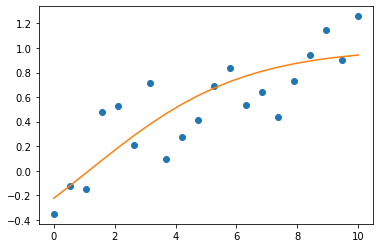

In [ ]:
X = np.linspace(0, 10, 20).reshape((-1,1)) # sneaky python trick
T = X * 0.1 + np.random.uniform(-0.4, 0.4, size=(20, 1)) # include noise sampled from a uniform distribution

def train(X, T, learning_rate, epochs):
    w = np.zeros((2, 1)) # init weights
    rho = learning_rate
    X1 = np.insert(X, 0, 1, 1) # insert a constant column of 1s into our input
    for iter in range(epochs): # train for t epochs
        for n in range(X.shape[0]): # for each input
            Xn = X1[n:n + 1, :] # get the nth x (preserving the dimensional stucture by slicing across each row)
            Tn = T[n:n + 1, :] # get the nth target
            yn = np.tanh(Xn @ w) # predict an output value by multiplying the input x by the weights w and applying a nonlinear function y
            # now update our weights
            # take the difference between the predicted value and the actual value (Tn - yn)
            # multiply this by the transpose of the input (Xn.T * {})
            # scale this by the learning rate and the derivative of f at yn (rho * {} * df(yn))
            w += rho * Xn.T * (Tn - yn) * (1-(np.tanh(yn)**2))
    return w, X1

weights, X1 = train(X,T,0.01,1000)
plt.plot(X, T, 'o')
plt.plot(X, np.tanh(X1 @ weights))
weights

What functions like $\sigma$ and $tanh$ do is bend the otherwise linear regression to better fit the data.  They do this in a nice curve.

ReLU does the same thing!

But, it picks one point in the line and puts in one bend.

This is far more computationally efficient, but less precise.  Let's say you wanted to cleanly separate the blue points from the orange points below:

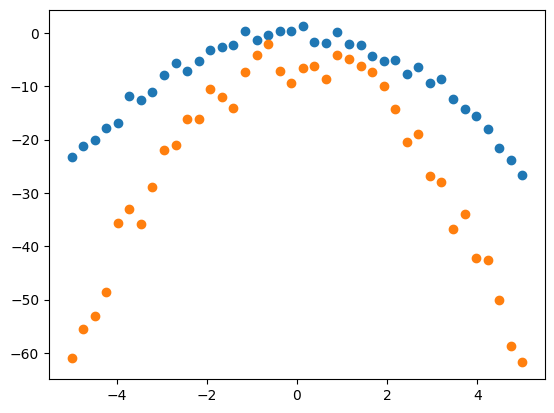

In [17]:
X = np.linspace(0, 10, 40).reshape((-1,1))-5
T1 = -X**2 + np.random.uniform(-2, 2, size=(40, 1))
T2 = -(1.5*X)**2 + np.random.uniform(-5, 5, size=(40, 1))-5
plt.plot(X, T1, 'o')
plt.plot(X, T2, 'o')

A $tanh$ layer or two could probably do it pretty well, drawing a nice, smooth envelope around the orange points.  ReLU with a single bend would have a harder time.

But... what if there were a bunch of ReLU units each with bends at different places?  That could approximate the same curve.

Remember, outside of the nonlinear activation function, all $Y = {\bf W}X + b$ does is slope the line and then move it around by $b$.  So, the right bias vector (which is learned using that constant column of 1s as inputs) could choose smart places to place each of those bends!

ReLU's real strength is in numbers.  A large number of rectifier units can approximate the nonlinear behavior of functions like $tanh$ with much more computational efficiency.

More here: https://towardsdatascience.com/if-rectified-linear-units-are-linear-how-do-they-add-nonlinearity-40247d3e4792

## Backprop with $tanh$ vs. backprop with ReLU

Remember how we derive our backprop operation, where $h$ is the activation function and $dh$ is its derivative.

$$
    \begin{align*}
      {\bf Z} &= h(\tilde{\bf X} {\bf V})\\
      {\bf Y} &= \tilde{\bf Z} {\bf W}\\
      {\bf V} & \leftarrow {\bf V} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\bf X}^T \left ( ({\bf T} - {\bf Y}) \hat{\bf W}^T \cdot  \frac{dh}{d(\tilde{\bf X} {\bf V})} \right )\\
      {\bf W} & \leftarrow {\bf W} + \rho_o \frac{1}{N}  \frac{1}{K}\tilde{\bf Z}^T ({\bf T} - {\bf Y})
      \end{align*}
$$

If $h$ is $tanh$, the backprop through ${\bf V}$ looks like:

$$
    \begin{align*}
      {\bf V} & \leftarrow {\bf V} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\bf X}^T \left ( ({\bf T} - {\bf Y}) \hat{\bf W}^T \cdot  (1-{\bf Z}^2) \right ) \Leftarrow \left (\frac{d tanh}{dx} = 1-tanh^2x \right )\\
      \end{align*}
$$

If $h$ is ReLU, the backprop through ${\bf V}$ should look like:

$$
    \begin{align*}
      {\bf V} & \leftarrow {\bf V} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\bf X}^T \left ( ({\bf T} - {\bf Y}) \hat{\bf W}^T \cdot  \begin{cases} 0, & \text{if } z \leq 0 \\ 1, & \text{if } z > 0 \end{cases} \right ) \Leftarrow \left (\frac{d ReLU}{dx} = \begin{cases} 0, & \text{if } x \leq 0 \\ 1, & \text{if } x > 0 \end{cases} \right )\\
      \end{align*}
$$

In [18]:
rho = 0.01

# create some data to represent sample inputs (X) and targets (T)
X = np.linspace(0,10,20).reshape((20, 1)) - 10
T = 0.2 + 0.05 * (X + 10) + 0.4 * np.sin(X + 10) + 0.2 * np.random.normal(size=(20, 1))

X1 = np.insert(X, 0, 1, axis=1)

# create some sample weights
V = np.random.uniform(-0.1, 0.1, size=(1 + 1, 5)) # 1 inputs, 5 hidden units
W = np.random.uniform(-0.1, 0.1, size=(1 + 5, 2)) # 2 outputs
Vtanh = np.array(V)
Vrelu = np.array(V)

Wtanh = np.array(W)
Wrelu = np.array(W)

# simulate 1 iteration of training with each activation function
Ztanh = np.tanh(X1 @ Vtanh)
Z1tanh = np.insert(Ztanh, 0, 1, axis=1)
Ytanh = Z1tanh @ Wtanh

Zrelu = relu(X1 @ Vrelu)
Z1relu = np.insert(Zrelu, 0, 1, axis=1)
Yrelu = Z1relu @ Wrelu

# store the error using each activation
error_tanh = T - Ytanh
error_relu = T - Yrelu

# Backward pass - the backpropagation and weight update steps
Vtanh = Vtanh + rho * X1.T @ ( ( error_tanh @ Wtanh[1:, :].T) * (1 - Ztanh**2))
Wtanh = Wtanh + rho * Z1tanh.T @ error_tanh

Vrelu = Vrelu + rho * X1.T @ ( ( error_relu @ Wrelu[1:, :].T) * drelu(Zrelu))
Wrelu = Wrelu + rho * Z1tanh.T @ error_relu

# calculate change in each weight
deltaVtanh = Vtanh-V
deltaVrelu = Vrelu-V
deltaWtanh = Wtanh-W
deltaWrelu = Wrelu-W

Now, let's view how the weights change depending on the layer and which activation function we use.

In [20]:
import pandas

# reshape the data to plot
V = V.reshape(np.prod(V.shape),1)
Vtanh = Vtanh.reshape(np.prod(V.shape),1)
deltaVtanh = deltaVtanh.reshape(np.prod(V.shape),1)
Vrelu = Vrelu.reshape(np.prod(V.shape),1)
deltaVrelu = deltaVrelu.reshape(np.prod(V.shape),1)

W = W.reshape(np.prod(W.shape),1)
Wtanh = Wtanh.reshape(np.prod(W.shape),1)
deltaWtanh = deltaWtanh.reshape(np.prod(W.shape),1)
Wrelu = Wrelu.reshape(np.prod(W.shape),1)
deltaWrelu = deltaWrelu.reshape(np.prod(W.shape),1)

dfV = pandas.DataFrame(np.hstack([V,Vtanh,deltaVtanh,Vrelu,deltaVrelu]), columns=('initial', 'after (w/ tanh)', 'change w/ tanh', 'after (w/ relu)', 'change w/ relu'))
dfW = pandas.DataFrame(np.hstack([W,Wtanh,deltaWtanh,Wrelu,deltaWrelu]), columns=('initial', 'after (w/ tanh)', 'change w/ tanh', 'after (w/ relu)', 'change w/ relu'))

In [ ]:
dfV

,initial,after (w/ tanh),change w/ tanh,after (w/ relu),change w/ relu
0,0.009209,0.001563,-0.007645,0.001248,-0.007960
1,0.026702,0.026844,0.000142,0.026724,0.000022
2,-0.082017,-0.080086,0.001930,-0.082017,0.000000
3,-0.023118,-0.029087,-0.005969,-0.029599,-0.006482
4,0.032016,0.034324,0.002308,0.032260,0.000245
5,-0.036796,-0.005275,0.031521,-0.002866,0.033930
6,0.082459,0.082411,-0.000048,0.082459,0.000000
7,0.073695,0.066499,-0.007197,0.073695,0.000000
8,-0.082974,-0.060932,0.022042,-0.053948,0.029027
9,0.033013,0.022660,-0.010353,0.032947,-0.000066


In [ ]:
dfW

,initial,after (w/ tanh),change w/ tanh,after (w/ relu),change w/ relu
0,-0.097646,0.027777,0.125423,0.026279,0.123926
1,-0.099832,0.029810,0.129643,0.029729,0.129562
2,0.010554,0.030446,0.019892,0.030084,0.019530
3,-0.071534,-0.050596,0.020938,-0.050596,0.020938
4,0.060306,0.024256,-0.036050,0.024937,-0.035368
5,-0.057333,-0.095349,-0.038017,-0.095350,-0.038018
6,-0.007536,-0.051838,-0.044302,-0.051094,-0.043558
7,0.025124,-0.021313,-0.046437,-0.021305,-0.046429
8,-0.013674,0.022971,0.036645,0.022282,0.035956
9,-0.040063,-0.001430,0.038633,-0.001429,0.038634


Finally: there are other types of activation functions closely related to ReLU:
* Gaussian Error Linear Unit (GELU): a smooth approximation of ReLU
* Sigmoid Linear Unit (SiLU): $x \cdot \sigma(x)$, another smoothed version of ReLU
* Leaky ReLU: allows a small, positive gradient when $x \leq 0$
* Parametric ReLU (PReLU): makes the coefficient of leakage into a learnable parameter
* Exponential Linear Unit (ELU): exponentiates negative values to keep mean activations close to 0